In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Input,Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D
from keras.models import Model
from PIL import Image

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_x, img_y = 28, 28

In [3]:
(x_train,_), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0],1,img_x, img_y)
x_test = x_test.reshape(x_test.shape[0],1,img_x, img_y)
input_shape = (1,img_x,img_y)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /=255
x_test /=255

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

In [8]:
x_test_noisy = np.clip(x_test_noisy, 0., 1. )
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

In [9]:
input_layer = Input(input_shape)

x = Conv2D(10, 5, activation = 'relu',data_format="channels_first")(input_layer)
x = MaxPooling2D(2,data_format="channels_first")(x)
x = Conv2D(20, 2, activation = 'relu',data_format="channels_first")(x)
x = MaxPooling2D(2,data_format="channels_first")(x)
encoded = x
x = UpSampling2D(2,data_format="channels_first")(x)
x = Conv2DTranspose(20, 2, activation = 'relu',data_format="channels_first")(x)
x = UpSampling2D(2,data_format="channels_first")(x)
x = Conv2DTranspose(10, 5, activation = 'relu',data_format="channels_first")(x)
x = Conv2DTranspose(1, 3 ,activation = 'sigmoid',data_format="channels_first")(x) 

In [10]:
model = Model(input = input_layer, output = x)
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_train_noisy, x_train, batch_size = 32, epochs = 1, verbose = 1, validation_data = (x_test_noisy,x_test))

model.save("noise.h5")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 24, 24)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 11, 11)        820       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 5, 5)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 20, 10, 10)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 20, 11, 11)        1620      
__________

In [11]:
test_sample = x_test_noisy[1]
test_prediction = model.predict(np.array([test_sample]))[0]

In [12]:
#test_sample = np.array((test_sample * 255)[0], dtype=np.uint8)
#im = Image.fromarray(test_sample)
#im.show()
#im.save('input_noise.png')

In [13]:
#test_prediction = np.array((test_prediction * 255)[0],dtype=np.uint8)
#im= Image.fromarray(test_prediction)
#im.show()
#im.save('output_noise.png')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

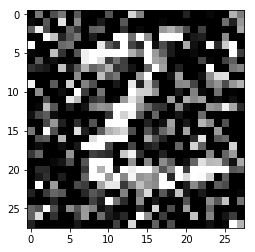

In [15]:
plt.imshow(np.array(test_sample * 255)[0],cmap='gray')

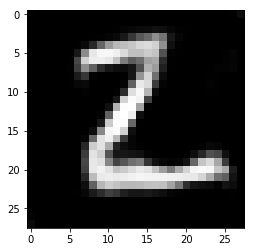

In [16]:
plt.imshow(np.array(test_prediction * 255)[0],cmap='gray')